 # <center><font color='darkblue'><u>TNQ  </u></font><font color='darkblue'><u> ASSESSMENT</u></font> <font color='lightgreen'><u>SEP</u> - <u>2022</u></font><font color='darkblue'> <u>SOLUTION</u></font><br></center>

## *Importing Necessary Library*

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

# Exclude Warning
import warnings
warnings.filterwarnings("ignore")

## *Loading the data*

In [35]:
df=pd.read_csv('world_population.csv')
df1=df

In [38]:
# Exploring data
df.sample(5)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
24,80,BOL,Bolivia,Sucre,South America,12224110,11936162,11090085,10223270,8592656,7096194,5736088,4585693,1098581,11.1272,1.0120,0.15
176,220,MAF,Saint Martin,Marigot,North America,31791,32552,35020,36458,29610,28127,7776,5802,53,599.8302,0.9951,0.00
152,150,MKD,North Macedonia,Skopje,Europe,2093599,2111072,2107962,2093828,2037936,2044174,1907023,1656783,25713,81.4218,0.9954,0.03
9,140,ARM,Armenia,Yerevan,Asia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.4831,0.9962,0.03
82,68,GTM,Guatemala,Guatemala City,North America,17843908,17362718,16001107,14543121,11735894,9084780,6987767,5453208,108889,163.8725,1.0134,0.22


## *EDA*

In [39]:
# Getting Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [40]:
# Shape of dataset 
df.shape

(234, 17)

In [6]:
# Description of date
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [7]:
# Description of data
df.describe(include='all')

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,234,234,234,234,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
unique,NaN,234,234,234,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,AFG,Afghanistan,Kabul,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,1,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,117.500000,NaN,NaN,NaN,NaN,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,NaN,NaN,NaN,NaN,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,NaN,NaN,NaN,NaN,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,NaN,NaN,NaN,NaN,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,NaN,NaN,NaN,NaN,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,NaN,NaN,NaN,NaN,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000


In [41]:
#finding duplicate data
df.duplicated().sum()

0

In [42]:
# Categorical Columns
cat_cols=df.select_dtypes(include='O').columns
print('categorical columns : ', list(cat_cols))

categorical columns :  ['CCA3', 'Country', 'Capital', 'Continent']


In [43]:
# Numerical feature columns
num_cols=df.select_dtypes(exclude='O').columns
print('Numerical columns : ', list(num_cols))

Numerical columns :  ['Rank', '2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate', 'World Population Percentage']


<AxesSubplot:>

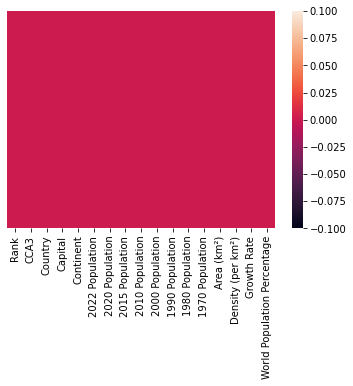

In [44]:
# Visualizing missing values in data
sns.heatmap(df.isna(),yticklabels=False)

In [45]:
# Checking for null values
df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [46]:
# Unique values in each categorical columns
df[cat_cols].nunique()

CCA3         234
Country      234
Capital      234
Continent      6
dtype: int64

In [47]:
# Droping the CCA3 and Capital columns
df.drop(['CCA3','Capital'],axis=1,inplace=True)

In [48]:
#number of countries in a continent
df['Continent'].value_counts()

Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Continent, dtype: int64

Text(111.375, 0.5, 'COUNT OF COUNTRIES')

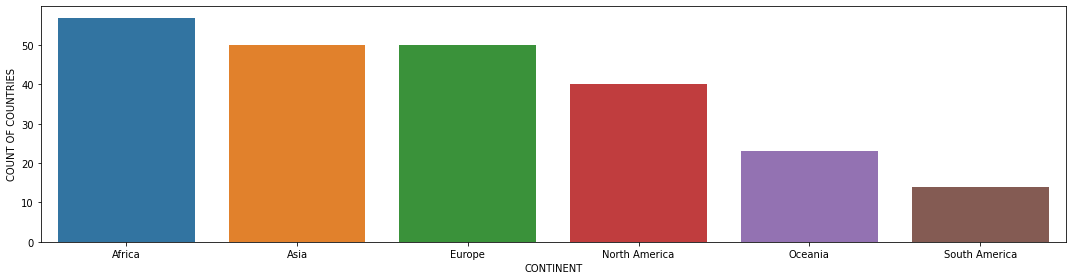

In [56]:
#Total number of contries in a continent
sns.countplot(x = 'Continent', data = df.sort_values(by = 'Continent', ascending = True))
plt.tight_layout()
plt.xlabel('CONTINENT')
plt.ylabel('COUNT OF COUNTRIES')

In [66]:
# population percentage of each continent
percen_cont = df.groupby('Continent')['World Population Percentage'].sum().round(1).sort_values(ascending= False).reset_index()
percen_cont

,Continent,World Population Percentage
0,Asia,59.2
1,Africa,17.9
2,Europe,9.3
3,North America,7.5
4,South America,5.5
5,Oceania,0.6


Text(0.5, 1.0, 'Continent - Population%')

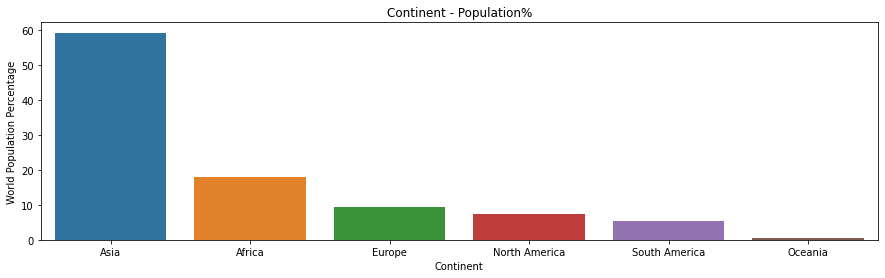

In [69]:
plt.figure(figsize= (15,4))
sns.barplot(x=percen_cont['Continent'],y=percen_cont['World Population Percentage'])
plt.title('Continent - Population%')

In [70]:
#Group the population of 1970 and 2022 by continent
ppl_70to22 = df.groupby('Continent')[['1970 Population','2022 Population']].sum().sort_values(by = 'Continent', ascending= True).reset_index()

In [71]:
#find the percentage of population
ppl_70to22['Percentage'] = round(ppl_70to22['1970 Population']/ ppl_70to22['2022 Population']*100,2)
ppl_70to22

,Continent,1970 Population,2022 Population,Percentage
0,Africa,365444348,1426730932,25.61
1,Asia,2144906290,4721383274,45.43
2,Europe,655923991,743147538,88.26
3,North America,315434606,600296136,52.55
4,Oceania,19480270,45038554,43.25
5,South America,192947156,436816608,44.17


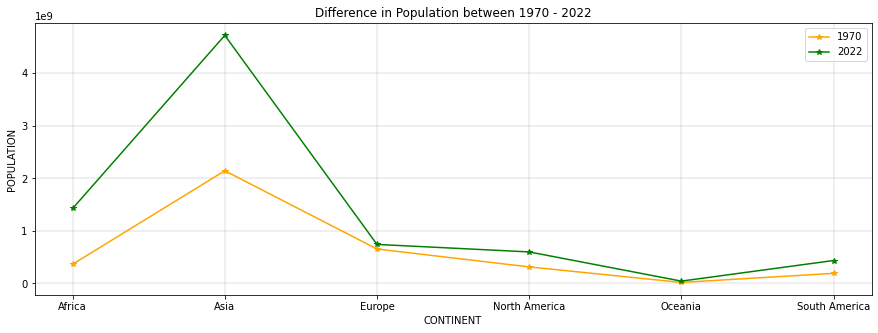

In [91]:
plt.figure(figsize = (15,5))
plt.plot(ppl_70to22['Continent'],ppl_70to22['1970 Population'], label = '1970', color = 'orange', marker = '*' )
plt.plot(ppl_70to22['Continent'],ppl_70to22['2022 Population'], label = '2022', color = 'green', marker = '*')
plt.title('Difference in Population between 1970 - 2022')
plt.xlabel('CONTINENT')
plt.ylabel('POPULATION')
plt.grid(linewidth = 0.4)
plt.legend()
plt.show()

In [92]:
Cn = df.groupby('Country')
Cn.sum().sort_values(by ='2022 Population', ascending = False)['2022 Population'].head(7)

Country
China            1425887337
India            1417173173
United States     338289857
Indonesia         275501339
Pakistan          235824862
Nigeria           218541212
Brazil            215313498
Name: 2022 Population, dtype: int64

In [93]:
def top_5_countries(Continent):
    cont = df[df['Continent'] == Continent]
    return cont.groupby('Country')['2022 Population'].sum().sort_values(ascending = False).head(5)

In [94]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [95]:
def bottom_5_countries(Continent):
    cont = df[df['Continent'] == Continent]
    return cont.groupby('Country')['2020 Population'].sum().sort_values(ascending = True).head(5)

In [100]:
print("Top countries of ASIA : ")
top_5_countries('Asia')

Top countries of ASIA : 


Country
China         1425887337
India         1417173173
Indonesia      275501339
Pakistan       235824862
Bangladesh     171186372
Name: 2022 Population, dtype: int64

In [102]:
print("Bottom countries of ASIA : ")
bottom_5_countries('Asia')

Bottom countries of ASIA : 


Country
Brunei          441725
Maldives        514438
Macau           676283
Bhutan          772506
Timor-Leste    1299995
Name: 2020 Population, dtype: int64

In [104]:
print("Top countries of NORTH AMERICA : ")
top_5_countries('North America')

Top countries of NORTH AMERICA : 


Country
United States    338289857
Mexico           127504125
Canada            38454327
Guatemala         17843908
Haiti             11584996
Name: 2022 Population, dtype: int64

In [105]:
print("Bottom countries of NORTH AMERICA : ")
bottom_5_countries('North America')

Bottom countries of NORTH AMERICA : 


Country
Montserrat                    4500
Saint Pierre and Miquelon     5906
Saint Barthelemy             10681
Anguilla                     15585
British Virgin Islands       30910
Name: 2020 Population, dtype: int64

In [106]:
top_10_growth = df.sort_values(by = 'Growth Rate', ascending = False).head(10)

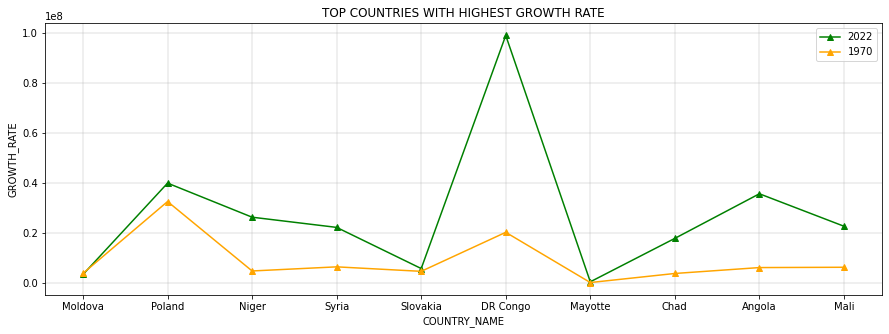

In [119]:
plt.figure(figsize = (15,5))
plt.plot(top_10_growth['Country'],top_10_growth['2022 Population'],marker = '^', label = '2022', color = 'green')
plt.plot(top_10_growth['Country'],top_10_growth['1970 Population'],marker = '^', label = '1970', color = 'orange')
plt.xlabel('COUNTRY_NAME')
plt.legend()
plt.ylabel('GROWTH_RATE')
plt.title('TOP COUNTRIES WITH HIGHEST GROWTH RATE')
plt.grid(linewidth = 0.4)
plt.show()

In [120]:
top_8_population = df.groupby('Country')['2022 Population'].sum().sort_values(ascending = False).head(8).reset_index()  
top_8_population

,Country,2022 Population
0,China,1425887337
1,India,1417173173
2,United States,338289857
3,Indonesia,275501339
4,Pakistan,235824862
5,Nigeria,218541212
6,Brazil,215313498
7,Bangladesh,171186372


Text(0.5, 1.0, 'TOP 8 COUNTRY WITH HIGHEST POPULATION')

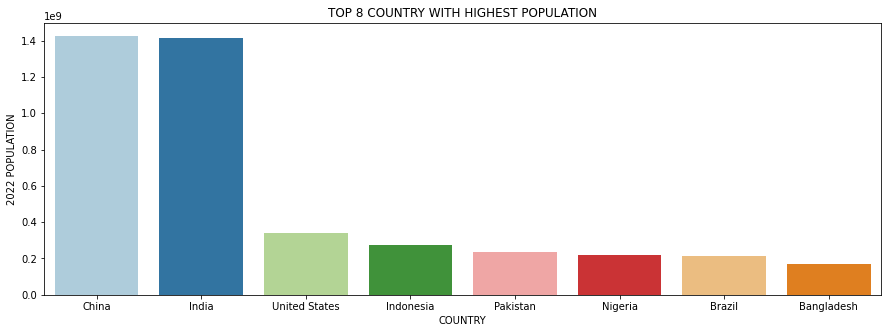

In [123]:
plt.figure(figsize = (15,5))
sns.barplot(x= 'Country', y = '2022 Population', data = top_8_population, palette = 'Paired')
plt.xlabel('COUNTRY')
plt.ylabel('2022 POPULATION')
plt.title('TOP 8 COUNTRY WITH HIGHEST POPULATION')

In [124]:
# growth rate of each continents
gr = df.groupby('Continent')['Growth Rate'].sum().reset_index()
total_growth_rate = df['Growth Rate'].sum()
gr['Per Growth Rate'] = round(gr['Growth Rate']/total_growth_rate*100,2)
gr

,Continent,Growth Rate,Per Growth Rate
0,Africa,58.2109,24.64
1,Asia,50.4692,21.36
2,Europe,50.1128,21.21
3,North America,40.1670,17.00
4,Oceania,23.1698,9.81
5,South America,14.1114,5.97
